<a href="https://colab.research.google.com/github/mixmaxze/pln_noticias_e_satiras/blob/main/Classifica%C3%A7%C3%A3o_de_not%C3%ADcias_e_s%C3%A1tiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classificando notícias reais e notícias satíricas**


### Desenvolvido por José Matheus do Nascimento Gama para a disciplina de Processamento de Linguagem Natural (PLN) do curso de Ciência de Computação (UFCG).

### Neste notebook utilizamos os algoritmos de classificação Naive Bayes, Regressão Logística e Máquinas de Vetores de Suporte para classificar notícas satíricas e notícias reais. A base de dados com notícias reais e satíricas foi coletada de sites mainstream de notícias e do Sensacionalista, respectivamente.

### Importando bibliotecas e conjunto de dados

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

sns.set(color_codes = True)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url = "https://drive.google.com/file/d/1dmjTruJJy-K8LlbVjR1zddH2bI9sK0_q/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]

df = pd.read_csv(path)

In [ ]:
df.sample(10)

,title,text,label
5789,governo exonera ministros para afastar suplent...,os ministros pernambucanos mendonca filho educ...,real
4392,flamenguista e preso por gastar dinheiro da p...,ubirata freitas da silva foi preso nesta tarde...,satire
3326,juizes limpam a bunda com a ficha limpa,funcionarios do supremo tribunal federal encon...,satire
9337,temer e putin citam combate a corrupcao,moscou ao fim da primeira viagem oficial de mi...,real
307,dilma nem o filho de deus agradou a todos. v...,durante coletiva de imprensa lancando o progra...,satire
2834,romero britto deu quadros iguais a lula doria...,prefeito eleito de sao paulo joao doria psdb g...,satire
8099,moro bloqueia r 6 mi de tiago cedraz e mais um...,o juiz federal sergio moro decretou o bloqueio...,real
3820,gay assaltado e agredido por homem a quem ped...,o gerente de boate rodrigo ambrogi de 19 anos ...,satire
2091,executivo da friboi admite que contratar robe...,um executivo da friboi admitiu que contratar o...,satire
3950,dia 16 especialista estima que protesto nas r...,uma grande mobilizacao popular vai tomar conta...,satire


#### Exibindo a distribuição de dados classificados em notícias reais ou sátiras


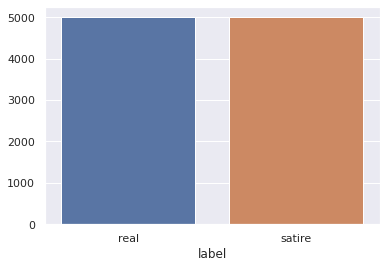

In [ ]:
dist = df.groupby(["label"]).size()

sns.barplot(x = dist.keys(), y = dist.values)

### 1. Utilizando os títulos

In [ ]:
# Criando um tokenizador
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Pegando as stopwords da língua portuguesa
stop_words = set(stopwords.words('portuguese'))

# Criando um vetorizador TF (term frequency)
count_vec = CountVectorizer(stop_words= stop_words,
                            ngram_range = (1,3),
                            tokenizer = token.tokenize)

# Transforma os títulos em uma matriz de tokens
title_counts = count_vec.fit_transform(df['title'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


#### Separando os dados de treino e os dados de teste
#### Nossa **variável alvo** é a coluna 'label' (notícia ou sátira)
#### 75% dos dados serão utilizados para treino e os outros 25% serão utilizados para teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(title_counts, df['label'], test_size=0.25, random_state=5)

#### Classificando com Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predicted_nb = MNB.predict(X_test)
accuracy_score_nb = metrics.accuracy_score(predicted_nb, Y_test)
print(str('{:04.2f}'.format(accuracy_score_nb*100))+'%')

86.68%


#### Classificando com Regressão Logística

In [ ]:
LG = LogisticRegression(random_state = 10)
LG.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [ ]:
predicted_lg = LG.predict(X_test)
accuracy_score_lg = metrics.accuracy_score(predicted_lg, Y_test)
print(str('{:04.2f}'.format(accuracy_score_lg*100))+'%')

86.00%


#### Classificando com Máquinas de Vetores de Suporte

In [ ]:
SVC = svm.SVC(random_state = 10)
SVC.fit(X_train, Y_train)

SVC(random_state=10)

In [ ]:
predicted_svc = SVC.predict(X_test)
accuracy_score_svc = metrics.accuracy_score(predicted_svc, Y_test)
print(str('{:04.2f}'.format(accuracy_score_svc*100))+'%')

84.76%


## 2. Utilizando os textos

#### Transforma os textos em uma matriz de tokens

In [ ]:
text_counts = count_vec.fit_transform(df['text'])

#### Separando os dados de treino e os dados de teste


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['label'], test_size=0.25, random_state=5)

#### Classificando com Naive Bayes

In [ ]:
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predicted_nb = MNB.predict(X_test)
accuracy_score_nb = metrics.accuracy_score(predicted_nb, Y_test)
print(str('{:04.2f}'.format(accuracy_score_lg*100))+'%')

86.00%


#### Classificando com Regressão Logística

In [ ]:
LG.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [ ]:
predicted_lg = LG.predict(X_test)
accuracy_score_lg = metrics.accuracy_score(predicted_lg, Y_test)
print(str('{:04.2f}'.format(accuracy_score_lg*100))+'%')

97.88%


#### Classificando com Máquinas de Vetores de Suporte

In [ ]:
SVC.fit(X_train, Y_train)

SVC(random_state=10)

In [ ]:
predicted_svc = SVC.predict(X_test)
accuracy_score_svc = metrics.accuracy_score(predicted_svc, Y_test)
print(str('{:04.2f}'.format(accuracy_score_svc*100))+'%')

97.04%


## 3. Utilizando títulos + textos (conteúdo completo)

In [ ]:
# Criando uma coluna no DataFrame que concatena títulos e textos

df['full_content'] = (df['title'] + " " + df['text'])

# Transforma o conteúdo em uma matriz de tokens
content_counts = count_vec.fit_transform(df['full_content'])

#### Separando os dados de treino e os dados de teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(content_counts, df['label'], test_size=0.25, random_state=5)

#### Classificando com Naive Bayes

In [ ]:
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predicted_nb = MNB.predict(X_test)
accuracy_score_nb = metrics.accuracy_score(predicted_nb, Y_test)
print(str('{:04.2f}'.format(accuracy_score_lg*100))+'%')

97.88%


#### Classificando com Regressão Logística



In [ ]:
LG.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [ ]:
predicted_lg = LG.predict(X_test)
accuracy_score_lg = metrics.accuracy_score(predicted_lg, Y_test)
print(str('{:04.2f}'.format(accuracy_score_lg*100))+'%')

97.76%


#### Classificando com Máquinas de Vetores de Suporte

In [ ]:
SVC.fit(X_train, Y_train)

SVC(random_state=10)

In [ ]:
predicted_svc = SVC.predict(X_test)
accuracy_score_svc = metrics.accuracy_score(predicted_svc, Y_test)
print(str('{:04.2f}'.format(accuracy_score_svc*100))+'%')

97.12%


# Conclusões

| | Naive Bayes| Regressão Logística | MVS 
|:--------| :----------:| :------------------: | :---------:
|**Títulos**| 86.68% | 86.00%| 84.76% |
|**Textos** |  86.00% | 97.88% | 97.04%| 
|**Títulos + Textos** | 97.88% | 97.76%| 97.12% | 

- Utilizando somente os títulos, os algoritmos apresentam uma acurácia razoável, mas insuficiente comparado com as outras abordagens. Isso é esperado porque alguns títulos são insuficientes para dizer se a notícia é real ou não, visto que muitos deles são estruturados de uma maneira mais séria, como se tratasse de uma notícia real, mesmo não sendo. O contrário também acontece, pois alguns títulos de tom mais humorado, por exemplo, podem acabar sendo classificadas como notícias satíricas.
- Utilizando apenas os textos, o único algoritmo que não apresentou uma acurácia ótima foi o Naive Bayes. Os outros dois apresentaram uma acurácia quase máxima. Como há muito mais palavras aqui, era esperado que os algoritmos fizessem uma classificação melhor.
- Utilizando títulos e textos juntos, todos os algoritmos apresentaram uma acurácia altíssima. 